In [2]:
from plotly.subplots import make_subplots
import joblib as jl
from IPython.display import Image

from src.metrics.consolidated_tstat import tstat_cluster_mass
from src.visualization.interactive import plot_raw_pair, plot_time_ser_quant


In [5]:
cellid = 'TNC019a-042-5'# shifted
# cellid = 'TNC014-22-2'# shifted

site = cellid.split('-')[0]

raster_meta = {'reliability': 0.1,  # r value
        'smoothing_window': 0,  # ms
        'raster_fs': 20,  # thus can divide in four chunks
        'zscore': True,
        'stim_type': 'permutations'}
montecarlo = 10
cluster_threshold=0.05
load_fns = ['SC', 'PCA']
for load_fn in load_fns:
    out = tstat_cluster_mass.check_call_in_cache(site, cluster_threshold=cluster_threshold, montecarlo=montecarlo,
                         raster_meta=raster_meta, load_fn=load_fn)
    print(out)

True
True


In [3]:
DF = jl.load('/auto/users/mateo/code/context_probe_analysis/data/220518_shift_corr_metrics_test_DF')
filtered = DF.query("source == 'real' and metric =='integral' and mult_comp_corr == 'bf_cp'")\
    .sort_values(by=['value'], ascending=[False])
print(filtered.loc[:, ['id', 'context_pair', 'probe', 'value']].head(10))

                  id context_pair probe        value
49489  TNC019a-042-5        00_09     3  5068.941487
49415  TNC019a-042-5        00_08     3  4332.829207
50155  TNC019a-042-5        01_09     3  4256.599375
49193  TNC019a-042-5        00_05     3  4143.151221
65636  TNC019a-062-1        00_07     7  4079.658867
50081  TNC019a-042-5        01_08     3   3990.21382
68951  TNC019a-042-5        07_10     7  3934.707946
65600  TNC019a-026-2        00_07     7  3752.401753
61403  TNC019a-042-5        00_05     6  3645.672449
65562  TNC019a-062-1        00_06     7  3320.846616


raster_fs=30 is too low for a good scatter. defaulting to 100hz
________________________________________________________________________________
[Memory] Calling src.data.rasters.load_site_formated_raster...
load_site_formated_raster('TNC019a', part='all', smoothing_window=0, raster_fs=100)


[nems_lbhb.baphy_io INFO] Setting chancount=0 for stimfmt=envelope
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/316/TNC019a_387fb4226f91e33cfdd091e7e18baa6c4102807f.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC019/TNC019a10_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC019/TNC019a10_p_CPN.evp


_______________________________________load_site_formated_raster - 11.4s, 0.2min
________________________________________________________________________________
[Memory] Calling src.data.rasters.load_site_formated_raster...
load_site_formated_raster('TNC019a', part='all', smoothing_window=50, raster_fs=20)


[nems_lbhb.baphy_io INFO] Setting chancount=0 for stimfmt=envelope
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/316/TNC019a_c0755db808d68422fd1ee7fc2177c4515cf39528.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC019/TNC019a10_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC019/TNC019a10_p_CPN.evp


_______________________________________load_site_formated_raster - 10.0s, 0.2min
using t-score threshold for sample-alpha 0.05 -> t = 2.024394164575136
integral: 3295.39 d'*ms
center of mass: 487.08 ms
last bin: 950.00 ms


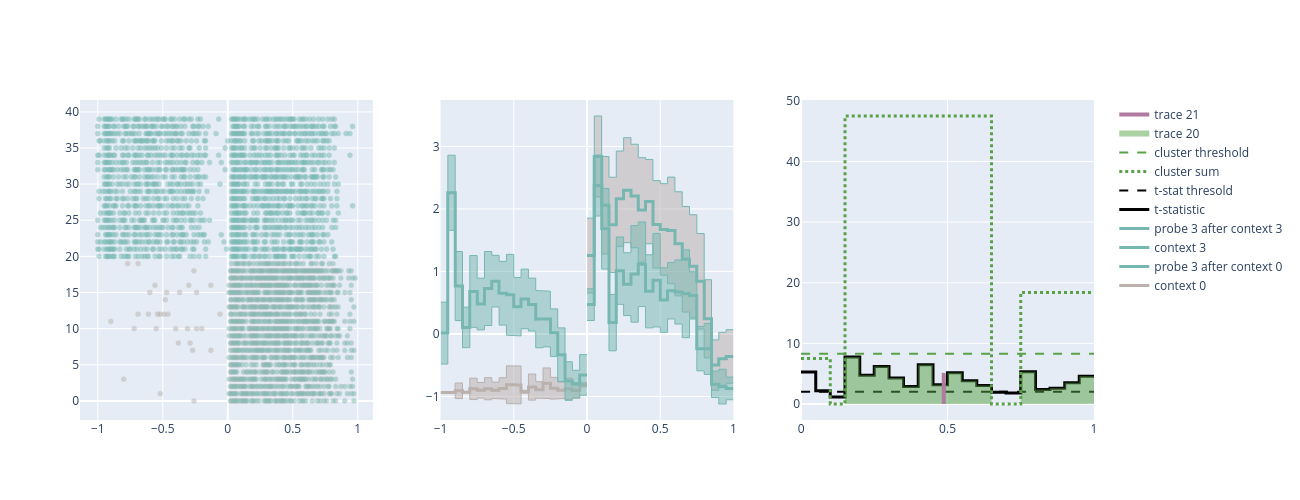

In [6]:
plot_meta = {'montecarlo':montecarlo, **raster_meta}

contexts = (0,3)
probe = 3
fig = make_subplots(1,3,False,False)

raster = plot_raw_pair(cellid, contexts, probe, type='raster', raster_fsp=100)
psth = plot_raw_pair(cellid, contexts, probe, type='psth', raster_fs=20)
quantif = plot_time_ser_quant(cellid, contexts, probe, [1,2], 0, 0.05,
                          alpha=0.05, source='real', meta=plot_meta)
subplots = [raster, psth, quantif]
fig = make_subplots(1,len(subplots),False,False)
for rr, ff  in enumerate(subplots):
    ntrace = len(ff['data'])
    fig.add_traces(data=ff['data'], rows=[1]*ntrace, cols=[rr+1]*ntrace)

img_bytes = fig.to_image(format="png", width=1300, height=500)
Image(img_bytes)

________________________________________________________________________________
[Memory] Calling src.dim_redux.PCA.load_site_formated_PCs...
load_site_formated_PCs('TNC019a', part='all', smoothing_window=50, raster_fs=20)
________________________________________________________________________________
[Memory] Calling src.data.rasters.load_site_formated_raster...
load_site_formated_raster('TNC019a', part='probe', recache_rec=False, smoothing_window=50, raster_fs=20)


[nems_lbhb.baphy_io INFO] Setting chancount=0 for stimfmt=envelope
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/316/TNC019a_c0755db808d68422fd1ee7fc2177c4515cf39528.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC019/TNC019a10_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC019/TNC019a10_p_CPN.evp


________________________________________load_site_formated_raster - 9.8s, 0.2min
___________________________________________load_site_formated_PCs - 9.8s, 0.2min
using t-score threshold for sample-alpha 0.05 -> t = 2.024394164575136
integral: 1314.09 d'*ms
center of mass: 241.80 ms
last bin: 400.00 ms


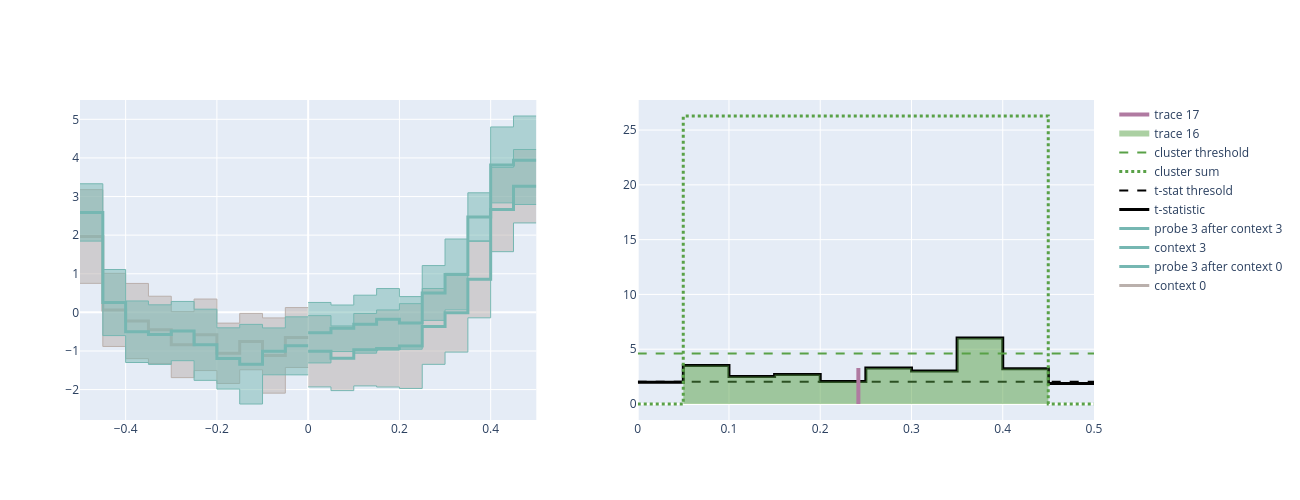

In [8]:
pcdi = f"{cellid.split('-')[0]}-PC-1"

# raster = plot_raw_pair(cellid, contexts, probe, type='raster', raster_fsp=100)
psth = plot_raw_pair(pcdi, contexts, probe, type='psth', raster_fs=plot_meta['raster_fs'])
quantif = plot_time_ser_quant(pcdi, contexts, probe, [1,2], 0, 0.05,
                          alpha=0.05, source='real', meta=plot_meta)

subplots = [psth, quantif]
fig = make_subplots(1,len(subplots),False,False)
for rr, ff  in enumerate(subplots):
    ntrace = len(ff['data'])
    fig.add_traces(data=ff['data'], rows=[1]*ntrace, cols=[rr+1]*ntrace)

img_bytes = fig.to_image(format="png", width=1300, height=500)
Image(img_bytes)

In [ ]:
toplot = DF.query("source == 'real' and metric in ['integral', 'last_bin'] and mult_comp_corr == 'bf_cp'").pivot_table(index=['id', 'context_pair', 'probe'], columns=['metric'], values='value', aggfunc='first').reset_index()
toplot=toplot.query("integral > 0")
import plotly.express as px
fig = px.scatter(data_frame=toplot, x='last_bin', y='integral', hover_data=['id', 'context_pair', 'probe'], marginal_x='histogram', marginal_y='histogram')
img_bytes = fig.to_image(format="png", width=1300, height=500)
Image(img_bytes)